In [133]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [134]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

import pandas as pd

In [135]:
#Loading the Data

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
from sklearn.metrics import accuracy_score

gammas = [0.01, 0.005, 0.001]
C_list =  [0.1, 0.2, 0.5, 0.7, 1, 2, 5]

In [136]:
train_frac = 0.1
test_frac = 0.1
dev_frac = 0.1

X_train, X_dev_test, y_train, y_dev_test = train_test_split(
    data, digits.target, test_size=1-train_frac, shuffle=True
)

X_test,X_dev, y_test,y_dev = train_test_split(
    X_dev_test, y_dev_test, test_size=(dev_frac)/(1-train_frac), shuffle=True
)


In [137]:
df =pd.DataFrame()

pg = []
pc =[]
acc =[]

for gamma in gammas:
    for c in C_list:
        # Create a classifier: a support vector classifier
        clf = svm.SVC(gamma=gamma, C=c)
        
        # Learn the digits on the train subset
        clf.fit(X_train, y_train)

        # Predict the value of the digit on the dev subset
        predicted_dev = clf.predict(X_dev)
        
        score = accuracy_score(y_pred=predicted_dev,y_true=y_dev)
        
        pg.append(gamma)
        pc.append(c)
        acc.append(score)
        
predicted = clf.predict(X_test)
        
        
df['Gamma'] = pg
df['C']= pc
df['Accuracy'] = acc

df

,Gamma,C,Accuracy
0,0.010,0.1,0.094444
1,0.010,0.2,0.094444
2,0.010,0.5,0.100000
3,0.010,0.7,0.105556
4,0.010,1.0,0.133333
5,0.010,2.0,0.194444
6,0.010,5.0,0.194444
7,0.005,0.1,0.094444
8,0.005,0.2,0.094444
9,0.005,0.5,0.144444


In [138]:
ac= df['Accuracy']
maximum = ac.max()
index = ac.idxmax()

print("The best test score is ", maximum," corresponding to hyperparameters gamma= ",pg[index]," C=",pc[index])

The best test score is  0.9166666666666666  corresponding to hyperparameters gamma=  0.001  C= 1


#Question 2

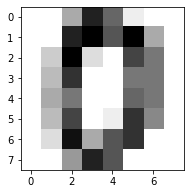

Image Size : 64 


In [139]:
digits = datasets.load_digits()
data = digits.images.reshape((n_samples, -1))

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()
print(f"Image Size : {digits.images[0].size} ")


the image with the size Prediction: 7
image_resized :[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



the image with the size Prediction: 2
image_resized :[[2.706176 2.662528 2.61888  ... 0.       0.       0.      ]
 [2.662528 2.619584 2.57664  ... 0.       0.       0.      ]
 [2.61888  2.57664  2.5344   ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 5.568    5.6608   5.7536  ]
 [0.       0.       0.       ... 5.5488   5.64128  5.73376 ]
 [0.       0.       0.       ... 5.5296   5.62176  5.71392 ]]





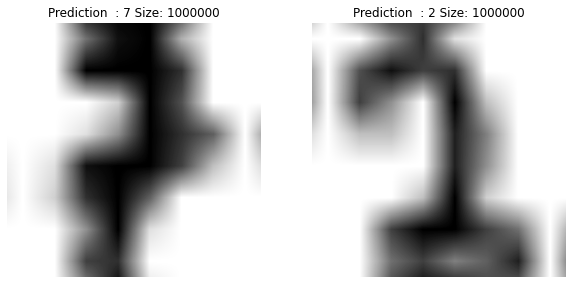

In [140]:
#For Resolution 1000*1000
from PIL import Image
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    image = resize(image, (1000, 1000),anti_aliasing=True)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    
    ax.set_title(f"Prediction  : {prediction}" f" Size: {image.size}")
    print("the image with the size" f" Prediction: {prediction}" )
    print(f"image_resized :{image}\n")
    print("\n")



the image with the size Prediction: 7
image_resized :[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



the image with the size Prediction: 2
image_resized :[[2.728044 2.706132 2.68422  ... 0.       0.       0.      ]
 [2.706132 2.684396 2.66266  ... 0.       0.       0.      ]
 [2.68422  2.66266  2.6411   ... 0.       0.       0.      ]
 ...
 [0.       0.       0.       ... 5.6595   5.7057   5.7519  ]
 [0.       0.       0.       ... 5.6497   5.69582  5.74194 ]
 [0.       0.       0.       ... 5.6399   5.68594  5.73198 ]]





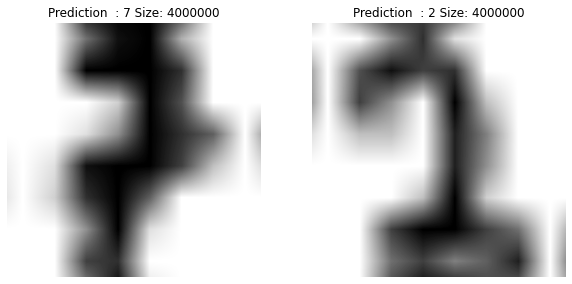

In [141]:
#For Resolution 2000*2000
from PIL import Image
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    image = resize(image, (2000,2000),anti_aliasing=True)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    
    ax.set_title(f"Prediction  : {prediction}" f" Size: {image.size}")
    print("the image with the size" f" Prediction: {prediction}" )
    print(f"image_resized :{image}\n")
    print("\n")



the image with the size Prediction: 7
image_resized :[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



the image with the size Prediction: 2
image_resized :[[2.74368165 2.73610242 2.72852319 ... 0.         0.         0.        ]
 [2.73863115 2.73106587 2.72350059 ... 0.         0.         0.        ]
 [2.73358066 2.72602933 2.718478   ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 5.71605232 5.73193024 5.74780816]
 [0.         0.         0.         ... 5.71376932 5.7296409  5.74551249]
 [0.         0.         0.         ... 5.71148633 5.72735157 5.74321681]]





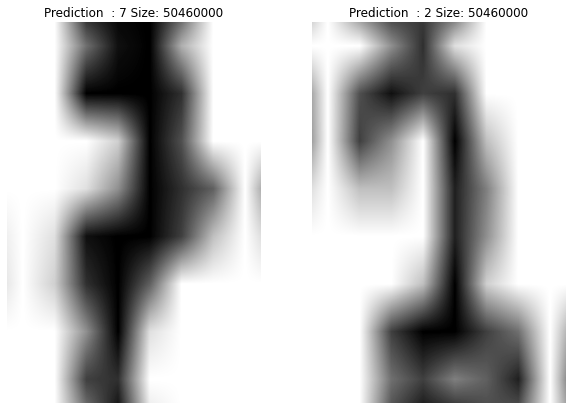

In [144]:
#For Resolution 3000*3000
from PIL import Image
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    image = resize(image, (3000,3000),anti_aliasing=True)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    
    ax.set_title(f"Prediction  : {prediction}" f" Size: {image.size}")
    print("the image with the size" f" Prediction: {prediction}" )
    print(f"image_resized :{image}\n")
    print("\n")